In [1]:
# Cargar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

In [2]:
# Se cargan los datos de entrenamiento

df_original = pd.read_csv('202220_Laboratorio_3_data_university_admission_train.csv', sep=',', encoding = 'utf-8', index_col=1)
df_tracks = df_original.copy()
print(df_tracks.shape)
df_tracks.head(5)

(1569, 9)


,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
Serial No.,,,,,,,,,
479,0,327,113,4,4.00,2.77,8.88,1,84.47
446,1,301,92,1,1.85,1.50,7.71,0,45.08
336,2,297,100,1,2.41,1.59,7.89,0,47.42
20,3,303,98,3,3.50,3.00,8.50,0,62.00
432,4,320,94,2,1.38,3.50,8.78,1,73.00


In [3]:
# Eliminar columna no relevante

df_tracks = df_tracks.drop('Unnamed: 0', axis = 1)
df_tracks

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
Serial No.,,,,,,,,
479,327,113,4,4.00,2.77,8.88,1,84.47
446,301,92,1,1.85,1.50,7.71,0,45.08
336,297,100,1,2.41,1.59,7.89,0,47.42
20,303,98,3,3.50,3.00,8.50,0,62.00
432,320,94,2,1.38,3.50,8.78,1,73.00
...,...,...,...,...,...,...,...,...
114,298,99,2,3.00,3.76,7.44,0,47.50
274,312,77,1,1.00,1.71,8.01,1,52.00
149,292,99,1,2.65,2.91,6.63,0,47.54


In [4]:
# Se cargan los datos de prueba

df_recent = pd.read_csv('202220_Laboratorio_3_data_university_admission_test.csv', sep=',', encoding = 'utf-8', index_col=0)
print(df_recent.shape)
df_recent.head(5)

(175, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
117,299,102,3,4.0,3.5,8.62,0
49,321,110,3,3.5,5.0,8.85,1
94,301,97,2,3.0,3.0,7.88,1
108,338,117,4,3.5,4.5,9.46,1
327,299,100,3,2.0,2.0,8.02,0


# Perfilamiento y entendimiento de datos

## Datos de entrenamiento

In [5]:
df_num = df_tracks.select_dtypes(['number']).copy()
df_num.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


Con la información posterior podemos ver que los datos son validos ya que concuerdan con las definiciones presentadas en el diccionario

<AxesSubplot:xlabel='Admission Points'>

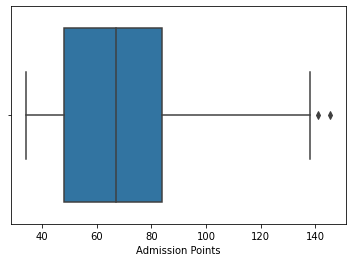

In [6]:
# Se visualiza la distribución de la variable objetivo

sns.boxplot(x=df_tracks["Admission Points"])

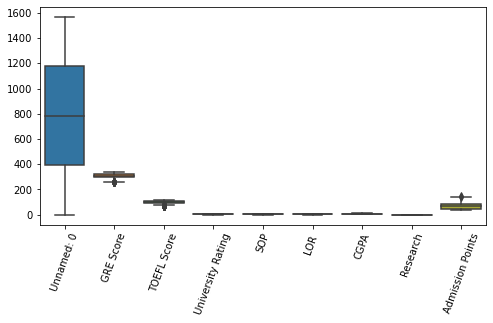

In [7]:
# Se visualiza la distribución de todas la variables

fig=plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df_original[df_original.columns])
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

<AxesSubplot:xlabel='GRE Score'>

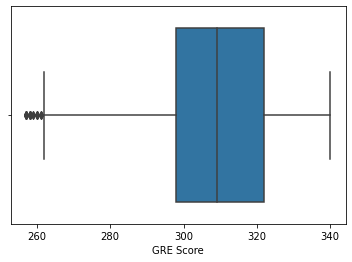

In [8]:
# Se visualizan las distribución es de todas las variables segun su escala

sns.boxplot(x=df_tracks["GRE Score"])

<AxesSubplot:xlabel='TOEFL Score'>

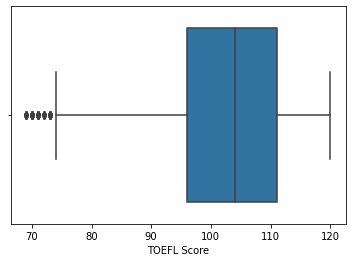

In [9]:
sns.boxplot(x=df_tracks["TOEFL Score"])

<AxesSubplot:xlabel='University Rating'>

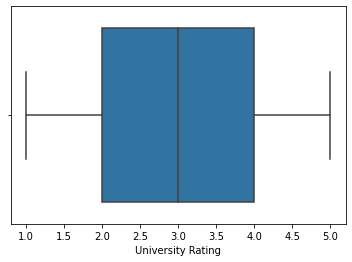

In [10]:
sns.boxplot(x=df_tracks["University Rating"])

<AxesSubplot:xlabel='SOP'>

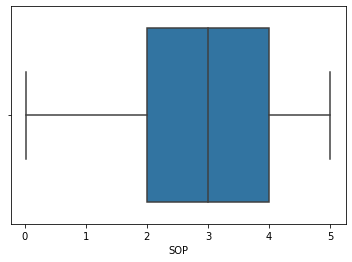

In [11]:
sns.boxplot(x=df_tracks["SOP"])

<AxesSubplot:xlabel='LOR '>

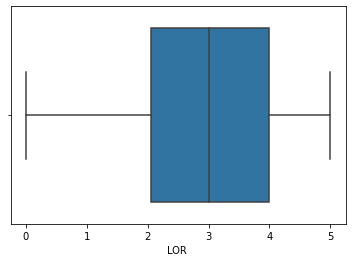

In [12]:
sns.boxplot(x=df_tracks["LOR "])

<AxesSubplot:xlabel='CGPA'>

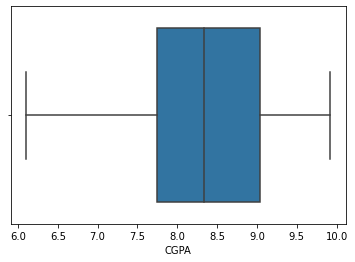

In [13]:
sns.boxplot(x=df_tracks["CGPA"])

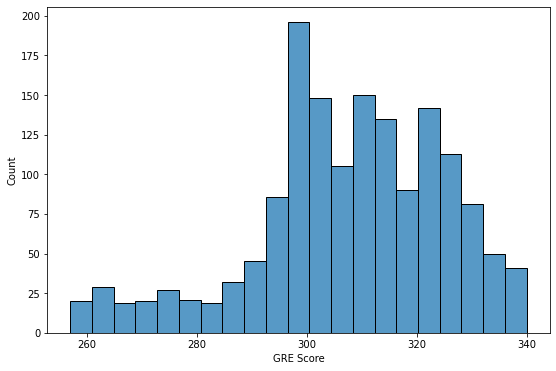

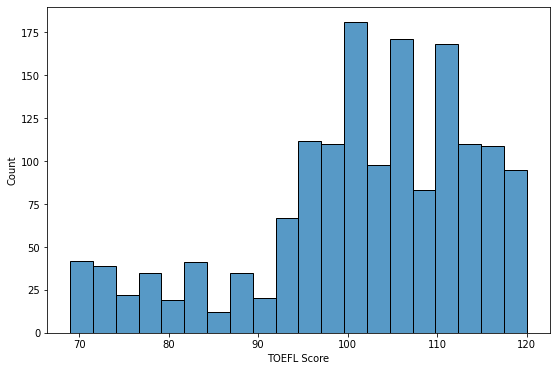

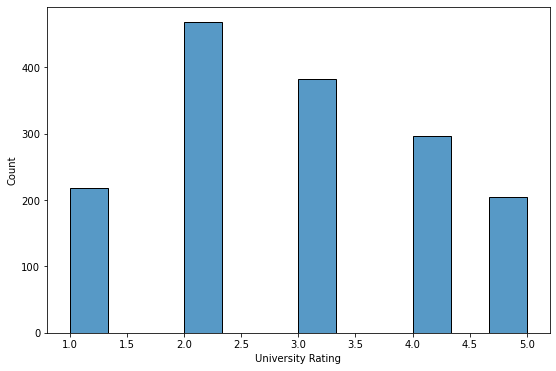

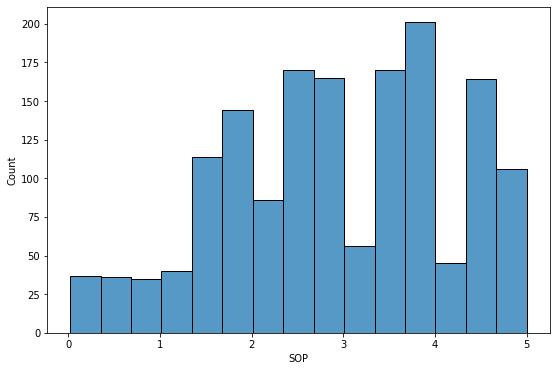

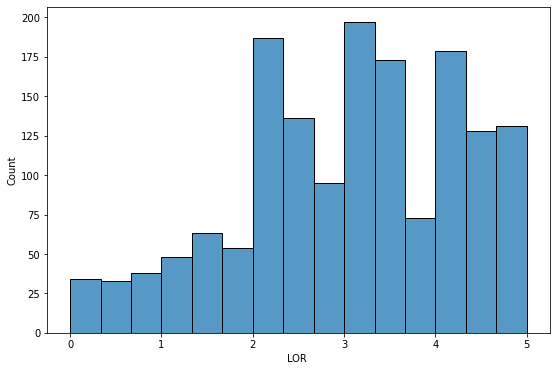

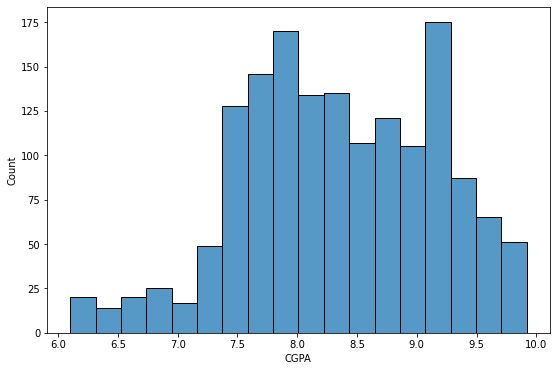

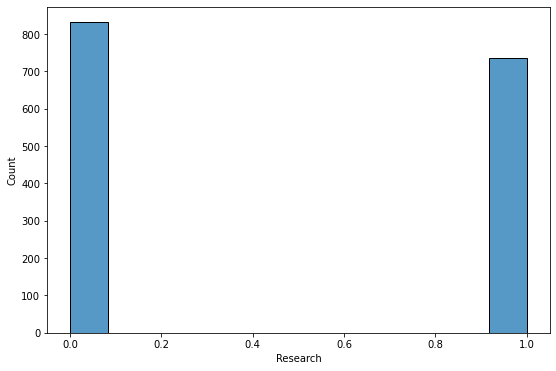

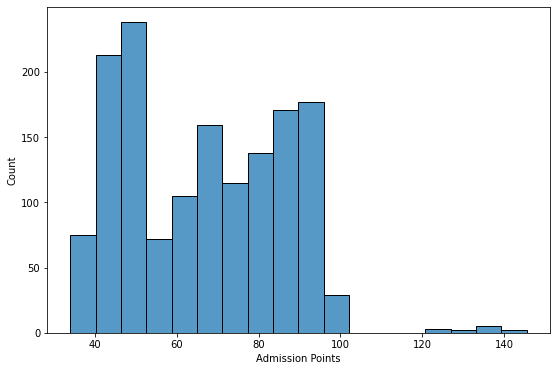

In [14]:
#Histogramas
df_num = df_tracks.select_dtypes(include = ['float','int'])
for col in df_num.columns:
    plt.figure(figsize=(9,6))
    plt.tight_layout()
    sns.histplot(df_num[col])

In [15]:
# Se visualiza el tipo de datos que hay en cada columna

df_tracks.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admission Points     float64
dtype: object

In [16]:
# Analizar la duplicidad de los datos

df_tracks.duplicated().sum()

18

In [17]:
# Analizar la completitud de los datos

df_tracks.isna().sum()

GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Admission Points     65
dtype: int64

## Datos de prueba

In [18]:
df_num = df_recent.select_dtypes(['number']).copy()
df_num.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,313.274286,105.748571,2.925714,3.315486,3.329543,8.447143,0.480000
std,13.015648,6.658733,1.222477,1.020774,0.924678,0.707217,0.501033
min,290.000000,93.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,301.000000,100.000000,2.000000,2.500000,2.600000,7.835000,0.000000
50%,312.000000,105.000000,3.000000,3.500000,3.190000,8.370000,0.000000
75%,324.000000,111.000000,4.000000,4.000000,4.000000,9.025000,1.000000
max,339.000000,119.000000,5.000000,5.000000,5.000000,9.870000,1.000000


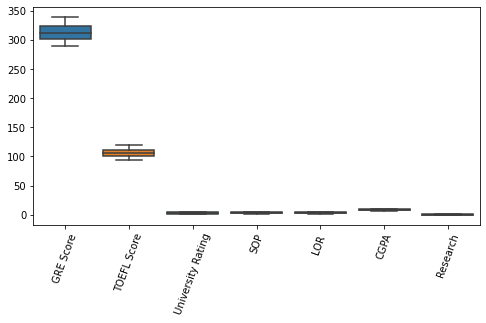

In [19]:
# Se visualiza la distribución de todas la variables

fig=plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df_recent[df_recent.columns])
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

<AxesSubplot:xlabel='GRE Score'>

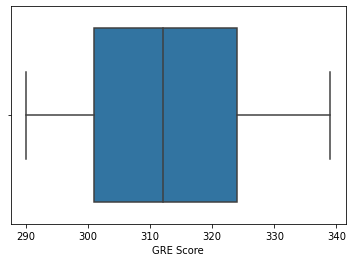

In [20]:
# Se visualizan las distribución es de todas las variables segun su escala

sns.boxplot(x=df_recent["GRE Score"])

<AxesSubplot:xlabel='TOEFL Score'>

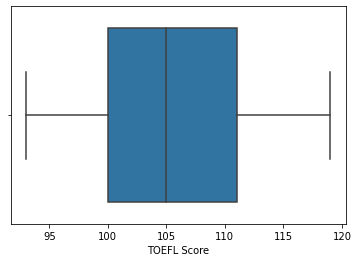

In [21]:
sns.boxplot(x=df_recent["TOEFL Score"])

<AxesSubplot:xlabel='University Rating'>

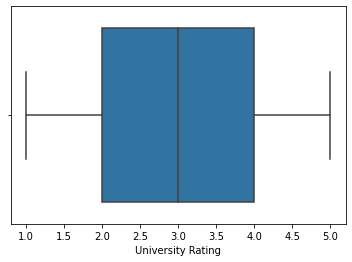

In [22]:
sns.boxplot(x=df_recent["University Rating"])

<AxesSubplot:xlabel='SOP'>

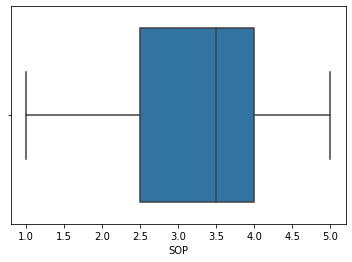

In [23]:
sns.boxplot(x=df_recent["SOP"])

<AxesSubplot:xlabel='LOR '>

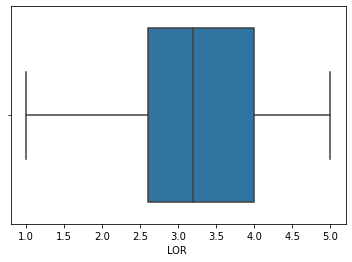

In [24]:
sns.boxplot(x=df_recent["LOR "])

<AxesSubplot:xlabel='CGPA'>

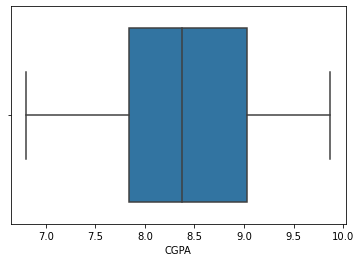

In [25]:
sns.boxplot(x=df_recent["CGPA"])

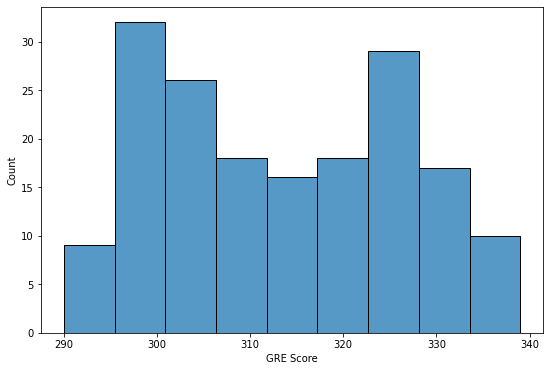

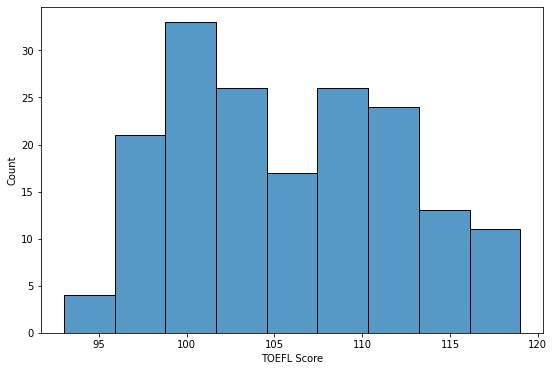

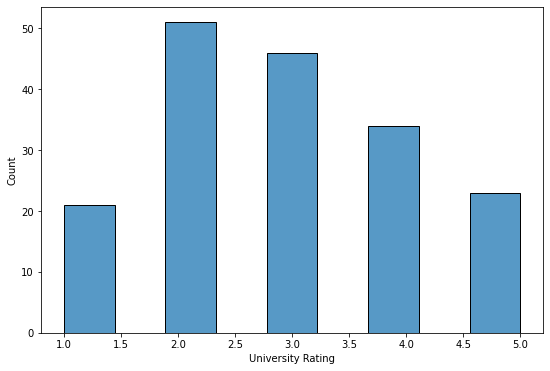

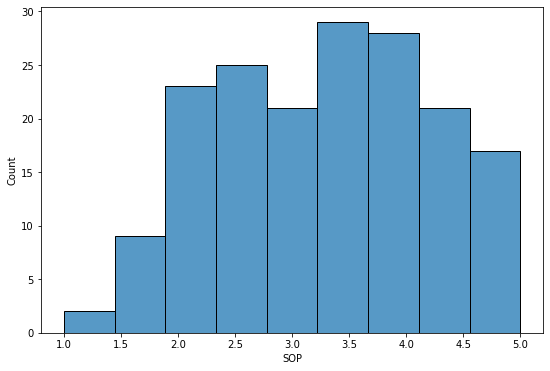

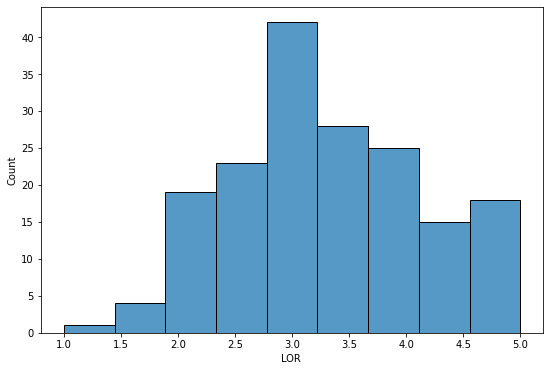

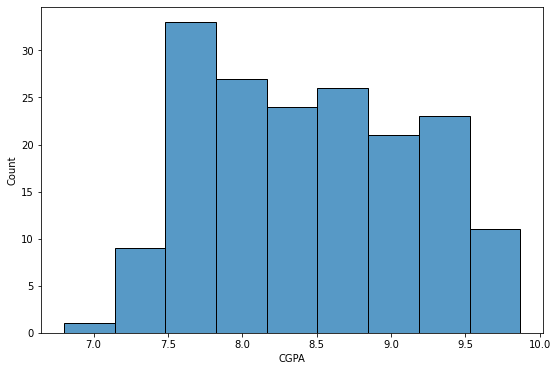

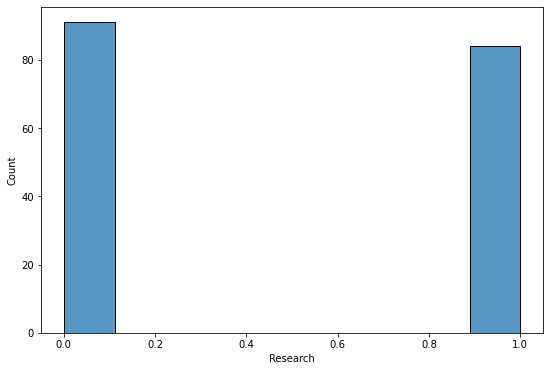

In [26]:
# Histogramas

df_num = df_recent.select_dtypes(include = ['float','int'])
for col in df_num.columns:
    plt.figure(figsize=(9,6))
    plt.tight_layout()
    sns.histplot(df_num[col])

In [27]:
# Se visualiza el tipo de datos que hay en cada columna

df_recent.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
dtype: object

In [28]:
# Analizar la duplicidad de los datos

df_recent.duplicated().sum()

15

In [29]:
# Analizar la completitud de los datos

df_recent.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

# Preparación de los datos

## Datos de entrenamiento

In [30]:
# Eliminamos los registros que tienen la variable objetivo nula

df_tracks_prep = df_tracks.dropna(subset = ['Admission Points'])

In [31]:
# Se eliminan los datos duplicados

df_tracks_prep = df_tracks_prep.drop_duplicates()

## Datos de prueba

In [32]:
# Se eliminan los datos duplicados

df_recent_prep = df_recent.drop_duplicates()

# Identificación de variables a utlizar

In [33]:
df_num = df_tracks_prep.select_dtypes(['number']).copy()
df_num.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,307.693809,101.553163,2.880888,2.976770,3.018964,8.347537,0.470390,66.795962
std,17.894184,12.501348,1.242870,1.236833,1.215772,0.812251,0.499291,19.277668
min,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,298.000000,96.000000,2.000000,2.000000,2.035000,7.770000,0.000000,48.000000
50%,309.000000,103.500000,3.000000,3.000000,3.000000,8.340000,0.000000,67.000000
75%,322.000000,111.000000,4.000000,4.000000,4.000000,9.050000,1.000000,84.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


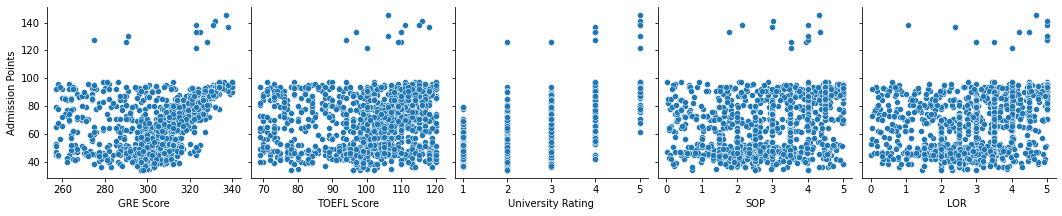

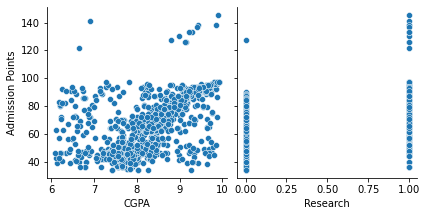

In [34]:
# Diagramas de disperción con respecto a la variable objetivo

sns.pairplot(df_tracks_prep, height=3, y_vars = 'Admission Points', x_vars = df_tracks_prep.columns[0:5], kind='scatter')
sns.pairplot(df_tracks_prep, height=3, y_vars = 'Admission Points', x_vars = df_tracks_prep.columns[5:7], kind='scatter')

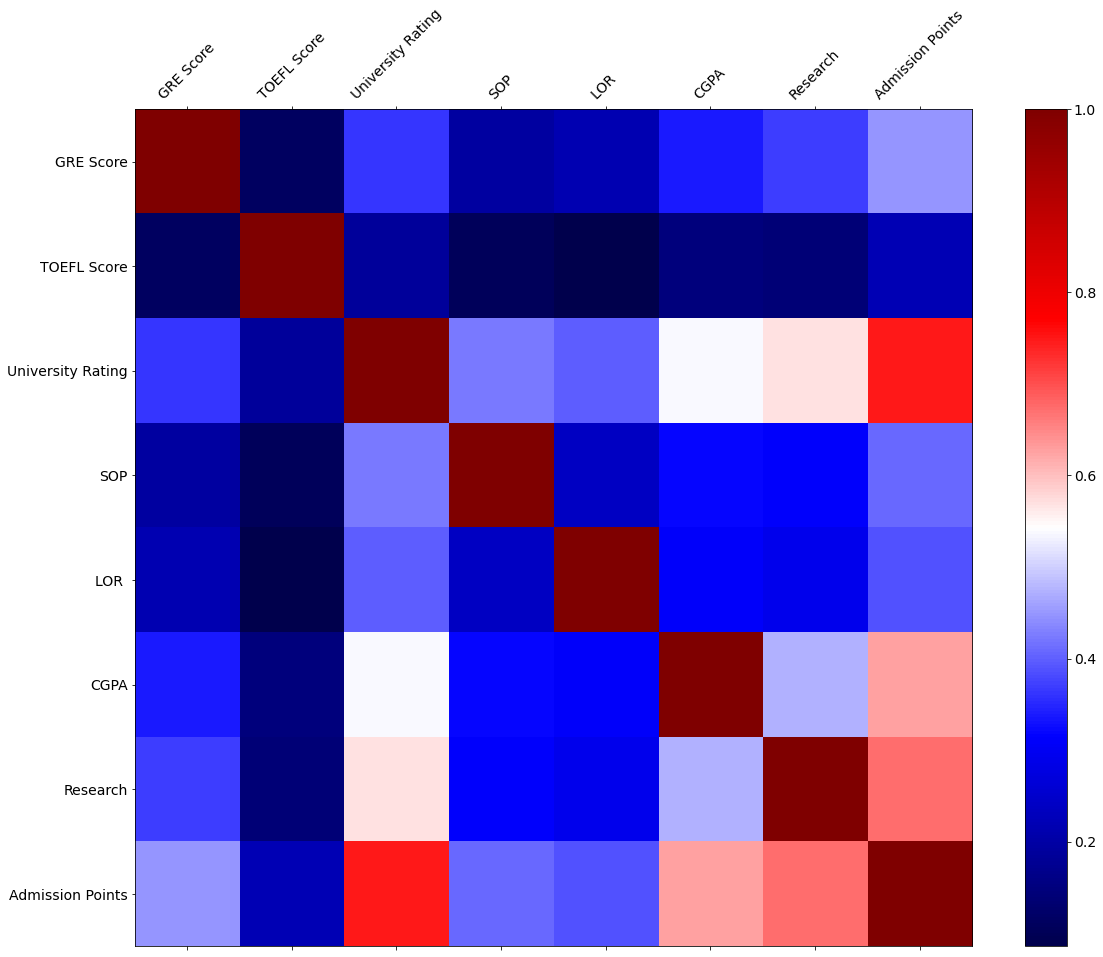

In [35]:
# Matriz de correlaciones para ver la relación entre variables

f = plt.figure(figsize=(19, 15))
plt.matshow(df_num.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [36]:
df_tracks_prep['CGPA_2'] = -np.exp(-df_tracks_prep['CGPA'])
df_recent['CGPA_2'] = -np.exp(-df_recent['CGPA'])
df_tracks_prep

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points,CGPA_2
Serial No.,,,,,,,,,
479,327,113,4,4.00,2.77,8.88,1,84.47,-0.000139
446,301,92,1,1.85,1.50,7.71,0,45.08,-0.000448
336,297,100,1,2.41,1.59,7.89,0,47.42,-0.000374
20,303,98,3,3.50,3.00,8.50,0,62.00,-0.000203
432,320,94,2,1.38,3.50,8.78,1,73.00,-0.000154
...,...,...,...,...,...,...,...,...,...
114,298,99,2,3.00,3.76,7.44,0,47.50,-0.000587
274,312,77,1,1.00,1.71,8.01,1,52.00,-0.000332
149,292,99,1,2.65,2.91,6.63,0,47.54,-0.001320


In [37]:
df_tracks_prep['CGPA_2'] = np.sqrt(df_tracks_prep['CGPA'])
df_recent['CGPA_2'] = np.sqrt(df_recent['CGPA'])
df_tracks_prep['GRE Score_2'] = np.sqrt(df_tracks_prep['GRE Score'])
df_recent['GRE Score_2'] = np.sqrt(df_recent['GRE Score'])
df_tracks_prep

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points,CGPA_2,GRE Score_2
Serial No.,,,,,,,,,,
479,327,113,4,4.00,2.77,8.88,1,84.47,2.979933,18.083141
446,301,92,1,1.85,1.50,7.71,0,45.08,2.776689,17.349352
336,297,100,1,2.41,1.59,7.89,0,47.42,2.808914,17.233688
20,303,98,3,3.50,3.00,8.50,0,62.00,2.915476,17.406895
432,320,94,2,1.38,3.50,8.78,1,73.00,2.963106,17.888544
...,...,...,...,...,...,...,...,...,...,...
114,298,99,2,3.00,3.76,7.44,0,47.50,2.727636,17.262677
274,312,77,1,1.00,1.71,8.01,1,52.00,2.830194,17.663522
149,292,99,1,2.65,2.91,6.63,0,47.54,2.574879,17.088007


In [38]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar

selected_cols = ['University Rating','CGPA_2','Research','GRE Score_2']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)]))]

In [39]:
# Se normaliza los datos

mms = MinMaxScaler()


df_tracks_prep_norm = mms.fit_transform(df_tracks_prep.select_dtypes(include=np.number).copy())
saved_cols = df_tracks_prep.select_dtypes(include=np.number).columns

df_tracks_prep_norm = pd.DataFrame(df_tracks_prep_norm, columns =saved_cols)

df_tracks_prep_norm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points,CGPA_2,GRE Score_2
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,0.610769,0.638297,0.470222,0.593729,0.603793,0.588360,0.470390,0.294134,0.611826,0.623958
std,0.215593,0.245124,0.310717,0.248360,0.243154,0.212631,0.499291,0.172894,0.208673,0.214145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.493976,0.529412,0.250000,0.397590,0.407000,0.437173,0.000000,0.125561,0.467286,0.511430
50%,0.626506,0.676471,0.500000,0.598394,0.600000,0.586387,0.000000,0.295964,0.615029,0.642550
75%,0.783133,0.823529,0.750000,0.799197,0.800000,0.772251,1.000000,0.448430,0.792168,0.794536
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df_tracks_prep = df_tracks_prep_norm

df_tracks.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


In [41]:
# Se genera el modelo

model = [('model', LinearRegression())]

In [42]:
# Se decalra el pipeline

pipeline = Pipeline(pre+model)

In [43]:
df_tracks_prep.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission Points', 'CGPA_2', 'GRE Score_2'],
      dtype='object')

In [44]:
# Se extrae las variables explicativas y objetivo para entrenar

X = df_tracks_prep[selected_cols]
y = df_tracks_prep['Admission Points']

pipeline = pipeline.fit(X,y)

In [45]:
X

,University Rating,CGPA_2,Research,GRE Score_2
0,0.75,0.750406,1.0,0.852173
1,0.00,0.451423,0.0,0.547427
2,0.00,0.498829,0.0,0.499391
3,0.50,0.655587,0.0,0.571325
4,0.25,0.725654,1.0,0.771356
...,...,...,...,...
1481,0.25,0.379265,0.0,0.511430
1482,0.00,0.530133,1.0,0.677903
1483,0.00,0.154550,0.0,0.438889
1484,0.25,0.622663,0.0,0.677903


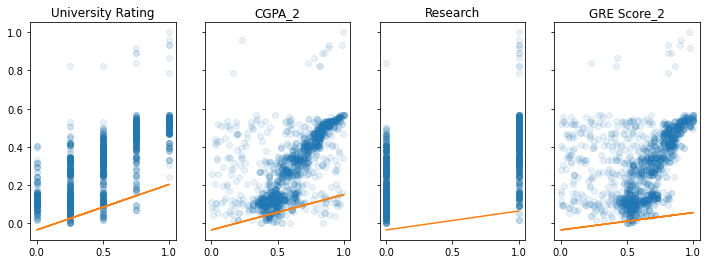

In [46]:
# Se visualiza la regresión lineal en cada dimensión

f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [47]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename) 

['pipeline.joblib']

In [48]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['University Rating',
                                                   'CGPA_2', 'Research',
                                                   'GRE Score_2'])])),
                ('model', LinearRegression())])

In [49]:
# Clasificamos los datos recientes

df_recent['Admission Points'] = p2.predict(df_recent)

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

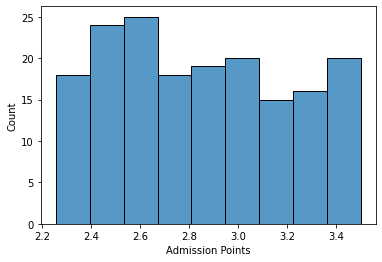

In [50]:
sns.histplot(df_recent['Admission Points'])

In [51]:
pipeline['model'].coef_

array([0.23797413, 0.1846637 , 0.09864716, 0.09066016])

In [52]:
# En DataFrame

pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,University Rating,0.237974
1,CGPA_2,0.184664
2,Research,0.098647
3,GRE Score_2,0.090660


In [53]:
# Extraemos las variables explicativas y objetivo para entrenar

X = df_tracks_prep.drop('Admission Points', axis = 1)
y = df_tracks_prep['Admission Points']

pipeline = pipeline.fit(X,y)

In [54]:
# Vuelve a imprimir los coeficientes

pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,University Rating,0.237974
1,CGPA_2,0.184664
2,Research,0.098647
3,GRE Score_2,0.090660


# Evaluación cuantitativa

In [55]:
p2.score(X,y)

0.6985751493469873

In [56]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

0.09489055551405874

**¿Su equipo recomienda instalar el modelo de estimación en producción o es mejor continuar usando expertos para la tarea?**

El modelo de estimación de nuestro equipo muestra unas metricas buenas, sin embargo aun creemos que no son lo suficientemente adecuados para ser puestos en producción. Una vez las metricas alcancen R^2 > 0.8 y RSME < 0.06, consideramos que el modelo es suficiente para el uso en producción. Por lo tanto, por el momento se recomienta continuar usando expertos para la tarea y seguir ajustando el modelo

**En caso de no recomendar el uso de un modelo de regresión ¿Qué otras posibilidades tiene la empresa? ¿Hacia dónde debe seguir con esta tarea?**

En este caso se podría recomendar en vez de intentar predecir el puntaje de admisión, acordar un puntaje suficientemente bueno para decidir si un candidato es elegible y convertir esto a una tarea de aprendizaje de clasificación. Este tipo de aprendeizaje consideramos que resuelve las necesidades presentadas.

# Evaluación cualitativa

## Validación de supuestos
**¿Qué obtuvieron con el ejercicio de regresión?**

Con el modelo de regresión obtuvimos un sistema cuantitativo para estimar el puntaje de admision de un candidato.

## Interpretación de los coeficientes
**¿Cuáles son las variables más influyentes y que tan confiables son los resultados?**

Nuestros resultados indican que las variables mas influyentes, en orden de influencia son las siguientes:
    - University Rating
    - sqrt(CGPA)
    - Research
    - sqrt(GRE Score)
    
Los resultados son bastante confiables segun las metricas obtenidas del modelo. Sin embargo, como ya fue expresado previamente, no consideramos que sean aun lo suficientemente confiables para ser usadas en un ambiente de producción.